Text to Vector using TFIDF

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read file
df=pd.read_csv("clean_text.csv")
df

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly
...,...,...,...,...
3955,Common app just randomly logged me out as I wa...,sadness,0.833,common app randomly log write college essay lose
3956,"I'd rather laugh with the rarest genius, in be...",sadness,0.688,laugh rarest genius beautiful alliance keep sa...
3957,If you #invest in my new #film I will stop ask...,sadness,0.458,new stop ask invest new film
3958,"Just watched Django Unchained, Other people ma...",sadness,0.333,watch django unchain people frown titter delight


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Text        3960 non-null   object 
 1   Emotion     3960 non-null   object 
 2   Intensity   3960 non-null   float64
 3   Clean_Text  3927 non-null   object 
dtypes: float64(1), object(3)
memory usage: 123.9+ KB


In [4]:
#descriptive statistics
df.describe(include="object")

,Text,Emotion,Clean_Text
count,3960,3960,3927
unique,3900,4,3200
top,"Just watched Django Unchained, Other people ma...",fear,watch amazing broadcast
freq,3,1257,54


In [5]:
#drop duplicated records
df.drop_duplicates(inplace=True)

In [6]:
#checking missing values
df.isna().sum()

Text           0
Emotion        0
Intensity      0
Clean_Text    33
dtype: int64

In [7]:
#drop missing values
df.dropna(inplace=True)

fear       1243
anger       936
joy         893
sadness     855
Name: Emotion, dtype: int64


<AxesSubplot:xlabel='Emotion', ylabel='count'>

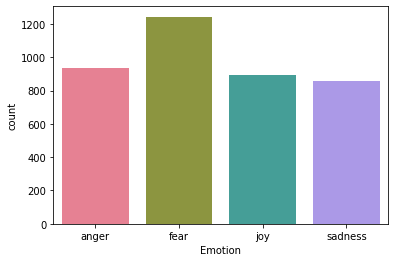

In [8]:
#checking imbalance or not
print(df["Emotion"].value_counts())
sns.countplot(df["Emotion"],palette="husl")

In [9]:
#all records
df

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly
...,...,...,...,...
3955,Common app just randomly logged me out as I wa...,sadness,0.833,common app randomly log write college essay lose
3956,"I'd rather laugh with the rarest genius, in be...",sadness,0.688,laugh rarest genius beautiful alliance keep sa...
3957,If you #invest in my new #film I will stop ask...,sadness,0.458,new stop ask invest new film
3958,"Just watched Django Unchained, Other people ma...",sadness,0.333,watch django unchain people frown titter delight


In [10]:
#reset index
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)
df

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly
...,...,...,...,...
3922,Common app just randomly logged me out as I wa...,sadness,0.833,common app randomly log write college essay lose
3923,"I'd rather laugh with the rarest genius, in be...",sadness,0.688,laugh rarest genius beautiful alliance keep sa...
3924,If you #invest in my new #film I will stop ask...,sadness,0.458,new stop ask invest new film
3925,"Just watched Django Unchained, Other people ma...",sadness,0.333,watch django unchain people frown titter delight


TFIDF(converting text to vectors)

In [11]:
#apply TF-IDF for transformation
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=1000)
x=vectorizer.fit_transform(df["Clean_Text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#get features name
vectorizer.get_feature_names_out()

array(['able', 'absolute', 'absolutely', 'accept', 'accept challenge',
       'account', 'act', 'action', 'actually', 'add', 'address', 'adult',
       'af', 'affliction', 'afraid', 'afternoon', 'age', 'agent',
       'aggravate', 'ago', 'ai', 'air', 'alarm', 'alive', 'allow',
       'amazing', 'amazing broadcast', 'america', 'american', 'americans',
       'amp', 'anger', 'angry', 'animal', 'animate', 'anniversary',
       'answer', 'anxiety', 'apparently', 'appearance', 'appreciate',
       'argument', 'arm', 'arrive', 'article', 'ask', 'ass', 'assume',
       'attack', 'attempt', 'average', 'avoid', 'awareness', 'away',
       'awe', 'awesome', 'awful', 'baby', 'bad', 'bake', 'ball', 'band',
       'bar', 'base', 'battle', 'bc', 'bear', 'beat', 'beautiful', 'bed',
       'begin', 'behavior', 'believe', 'bet', 'big', 'bill', 'birthday',
       'bit', 'bitch', 'bitter', 'black', 'black man', 'black people',
       'blame', 'bless', 'blessing', 'block', 'blood', 'blood boil',
       'b

In [13]:
#save the tfidf vectorizer
import pickle

pickle.dump(vectorizer,open("tfidf.pkl","wb"))

In [14]:
#make dataframe for clustering
df1=pd.DataFrame(x,columns=[vectorizer.get_feature_names_out()])
df1.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#original dataframe
df

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly
...,...,...,...,...
3922,Common app just randomly logged me out as I wa...,sadness,0.833,common app randomly log write college essay lose
3923,"I'd rather laugh with the rarest genius, in be...",sadness,0.688,laugh rarest genius beautiful alliance keep sa...
3924,If you #invest in my new #film I will stop ask...,sadness,0.458,new stop ask invest new film
3925,"Just watched Django Unchained, Other people ma...",sadness,0.333,watch django unchain people frown titter delight


In [16]:
#vectorized dataframe
df1["Emotion"]=df["Emotion"]
df1["Intensity"]=df["Intensity"]
df1.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896


In [17]:
#save vectorized dataframe for model building
df.to_csv("clean_text1.csv",index=False)
df1.to_csv("vector.csv",index=False)